In [33]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [34]:
! pip install numpy

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



In [36]:
titanic =pd.read_csv('Titanic+Data+Set.csv')

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic.shape

(891, 12)

In [39]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

c:\Users\D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

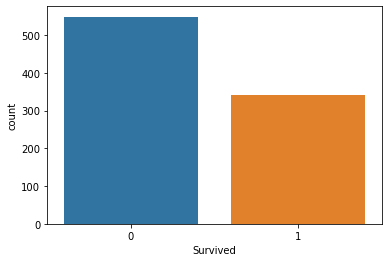

In [41]:
sns.countplot(titanic["Survived"])

c:\Users\D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\D\anaconda3\lib\site-packages\seab

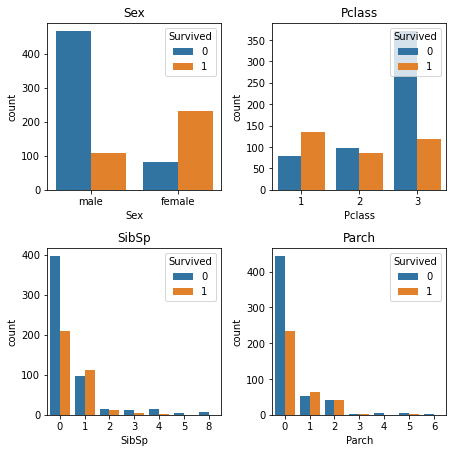

In [42]:
cols = [ 'Sex', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(titanic[cols[i]], hue=titanic["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout

In [43]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [44]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

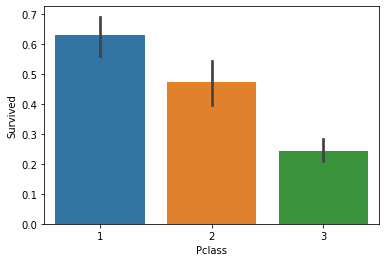

In [45]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

In [46]:
age = pd.cut(titanic['Age'], [0, 18, 80])
titanic.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [47]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
titanic = titanic.drop(['PassengerId','Ticket'],axis=1)

In [49]:
titanic = titanic.dropna(subset =['Embarked', 'Age'])

In [50]:
titanic.shape

(712, 10)

In [51]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [52]:
titanic = titanic.drop(['Name'],axis=1)

In [53]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [54]:
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [55]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [56]:

#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)
#print(labelencoder.fit_transform(titanic.iloc[:,2].values))

#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)
#print(labelencoder.fit_transform(titanic.iloc[:,7].values))

#Print the NEW unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[1 0]
['S' 'C' 'Q']


In [57]:
titanic.shape

(712, 9)

In [58]:
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =00 )

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
def models(model):


  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

  model.fit(X_train, Y_train)
  print('Classifier Training Accuracy:', model.score(X_train, Y_train))
  return  model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
tree = DecisionTreeClassifier(criterion = 'gini',max_depth=10, min_samples_leaf=3, random_state = 00)
Rf = RandomForestClassifier(criterion='entropy',n_estimators=600,max_depth=5,max_samples=3)
models(tree)
models(Rf)

2022/06/14 00:38:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a03185f888c74c32a3c4f735f1ee404f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/06/14 00:38:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e9ee56cc4e684b87ac0c5220f62fb59d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Classifier Training Accuracy: 0.8963093145869947
Classifier Training Accuracy: 0.6590509666080844


RandomForestClassifier(criterion='entropy', max_depth=5, max_samples=3,
                       n_estimators=600)

In [62]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [63]:
import mlflow.sklearn
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from mlflow import log_metric, log_param, log_artifacts

In [64]:

mlflow.set_experiment(experiment_name = 'Titanic1_survival_prediction')
mlflow.autolog()

   

2022/06/14 00:18:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2022/06/14 00:18:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
